# Cat vs Dod Audio Claaification using Mfccs

### 1: Extracting data into Dataframe (Train/Test)
### 2: Feature Extraction using MFccs and librosa module
### 3: Train test data creation
### 4: Modle building and training
### 5: Visualisations

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import os
import librosa 
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [6]:
pwd

'/home/honey/Desktop/Vidyashilp-Assignment/Task1'

#### **1: Extracting data into Dataframe (Train/Test)**

In [17]:
#Function to generate the train data
def generate_Train_data(directory):
    names = []
    label_names = []
    for folder in os.listdir(directory):
        #for each folder in cat and dog get the respective files
        for filename in os.listdir(directory + '/' + str(folder)):
            #for each file
            f = os.path.join(directory + '/' + str(folder), filename)
            names.append(f.split('/')[-1])
            label_names.append(f.split('/')[-2])
    return names, label_names

def generate_Test_data(directory):
    #test data creator
    names=[]
    label_names=[]
    for folder in os.listdir(directory):
        #print("folder = ", folder)
        for filename in os.listdir(directory + '/' + str(folder)):
            f = os.path.join(directory + '/' + str(folder), filename)
            names.append(f.split('/')[-1])
            label_names.append(f.split('/')[-2])
    for i in range(len(label)):
        if(label[i]=='test'):
            label[i]='dogs'
            
    return names, label_names

    

In [18]:
#calling the above function to generate train and test data
name, label = generate_Train_data('input/cats_dogs/train')
Tname, Tlabel = generate_Test_data('input/cats_dogs/test')
train_data = pd.DataFrame({'name': name, 'label': label})
test_data = pd.DataFrame({'name': Tname, 'label': Tlabel})



### **2: Feature Extraction using MFccs and librosa module**

In [24]:
def get_features(directory):
    features=[]
    names=[]
    #loop through the folder
    for folder in os.listdir(directory):
        #print("folder = ", folder)
        for filename in os.listdir(directory+ '/' + str(folder)):
            f = os.path.join(directory + '/' + str(folder), filename)
            #useing librosa we get the required audio format
            x,sr = librosa.load(f,sr=None)
            #extracted x is used to get mfccs as using librosa's feature.mfcc method
            mfccs= np.mean(librosa.feature.mfcc(x,sr=sr,n_mfcc=100).T,axis=0)
            features.append(mfccs)
            names.append(f.split('/')[-1])
    return [names, features]

In [47]:
names, train_features = get_features('input/cats_dogs/train')
T_names, test_features = get_features('input/cats_dogs/test')



In [31]:
print("train_features = ", len(train_features))

train_features =  210


### **3: Train test data creation**

In [32]:
#creating trainig and testing dataset using the feature extracted
X_train =np.array(train_features)
X_test =np.array(test_features)
Y_train=train_data.label
Y_test=test_data.label

In [33]:

Y_train=LabelEncoder().fit_transform(Y_train).reshape(-1,1)
Y_test =LabelEncoder().fit_transform(Y_test).reshape(-1,1)


print("Y_train shape = ", Y_train.shape)
print("Y_test shape = ", Y_test.shape)
print("X_train shape = ", X_train.shape)
print("Y_test shape = ", X_test.shape)

Y_train shape =  (210, 1)
Y_test shape =  (67, 1)
X_train shape =  (210, 100)
Y_test shape =  (67, 100)


### **4: Modle building and training**

In [51]:
def build_model():
    model=tf.keras.Sequential()
    model.add(layers.Dense(input_shape=(100,), units= 200,activation='relu'))
    model.add(layers.Dense(150,activation='relu'))
    model.add(layers.Dense(200,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    
    return model

def build_model2():
    model=tf.keras.Sequential()
    model.add(layers.Dense(input_shape=(100,), units= 200,activation='relu'))
    model.add(layers.Dense(25,activation='relu'))
    model.add(layers.Dense(25,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    
    return model

    

In [53]:
model = build_model()
model2 = build_model2()
model.summary()
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,Y_train,epochs=100,validation_data = (X_test,Y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_17 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 80,751
Trainable params: 80,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 143ms/step - loss: 29.3328 - accuracy: 0.6143 - val_loss: 2.3882 - val_accuracy: 0.4179
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.6286 - val_los

In [54]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist2=model.fit(X_train,Y_train,epochs=100,validation_data = (X_test,Y_test))

Epoch 1/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0694 - accuracy: 0.9714 - val_loss: 0.4927 - val_accuracy: 0.7761
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9952 - val_loss: 0.2975 - val_accuracy: 0.8955
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1216 - accuracy: 0.9667 - val_loss: 0.3203 - val_accuracy: 0.8806
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9857 - val_loss: 0.2508 - val_accuracy: 0.9254
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 0.9905 - val_loss: 0.3387 - val_accuracy: 0.8507
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9905 - val_loss: 0.2850 - val_accuracy: 0.9254
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9952 - val_loss: 0.3027 - val_accuracy: 0.8507
Epoch 8/100
7/7 [==========

### **5: Visualisations**

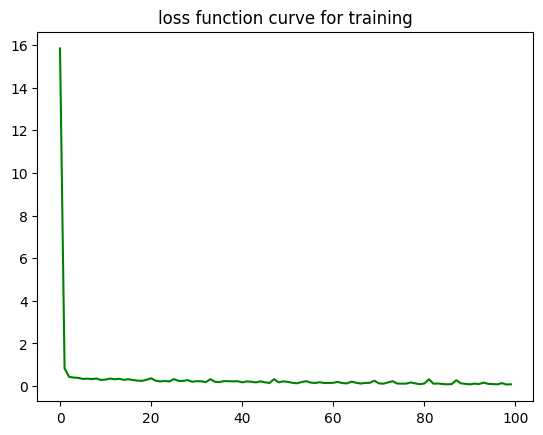

In [39]:
plt.title('loss function curve for training')
plt.plot(hist.history['loss'],color='green')
plt.show()

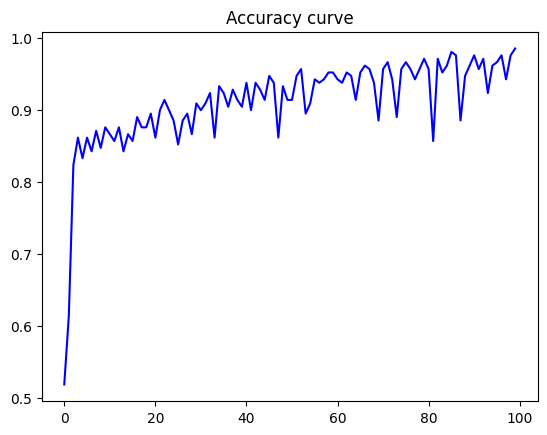

In [40]:
plt.title('Accuracy curve')
plt.plot(hist.history['accuracy'],color='blue')
plt.show()

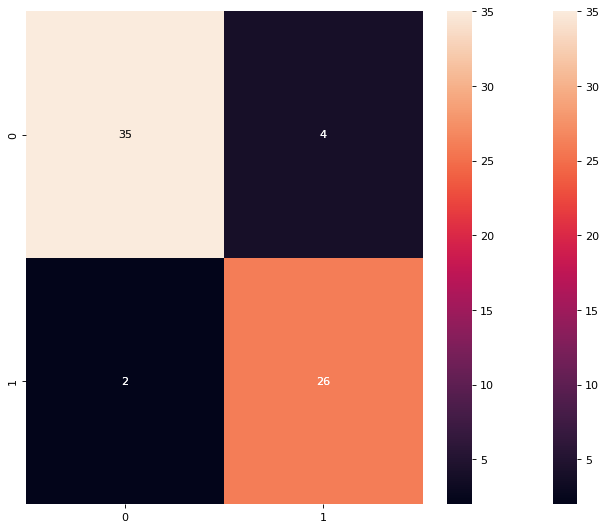

In [46]:
Y_predicted =model.predict(X_test)
#masking if greater than 0.5
Y_predicted =(Y_predicted>0.5)*1
sns.heatmap(confusion_matrix(Y_test,Y_predicted),annot=True,)
plt.show()

In [42]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()

NameError: name 'Y_pred' is not defined